<a href="https://colab.research.google.com/github/charlottevedrines/Python-Projects/blob/main/Assignment_6_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Q1**

The management of a textile company is concerned about the quality of their carpets and wants to implement a control chart to monitor the number of defects per carpet. They have collected data on 20 samples of carpets, each with varying sample sizes, and the number of defects in each sample is recorded.

| Sample Number | Number of Carpet Inspected | Number of Defects |
|---------------|---------------------------|------------------|
| 1             | 25                        | 12               |
| 2             | 20                        | 5                |
| 3             | 25                        | 7                |
| 4             | 15                        | 7                |
| 5             | 25                        | 10               |
| 6             | 15                        | 4                |
| 7             | 20                        | 6                |
| 8             | 15                        | 2                |
| 9             | 15                        | 4                |
| 10            | 25                        | 10               |
| 11            | 20                        | 9                |
| 12            | 20                        | 12               |
| 13            | 15                        | 14               |
| 14            | 25                        | 6                |
| 15            | 20                        | 7                |
| 16            | 25                        | 12               |
| 17            | 15                        | 5                |
| 18            | 25                        | 6                |
| 19            | 15                        | 8                |
| 20            | 25                        | 4                |

Construct a suitable control chart for the number of defects per carpet.

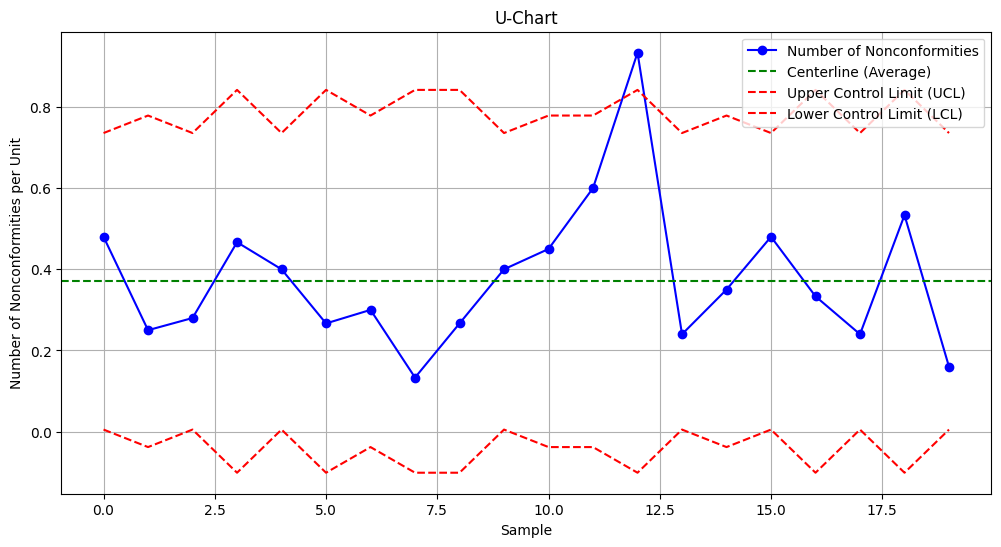

In [15]:
# The data collected is the number of defects per carpet.
# Because we are counting the number of defects per sample and the sample size is carrying we will construct a u chart

import numpy as np
import matplotlib.pyplot as plt

sample_sizes = [25, 20, 25, 15, 25, 15, 20, 15, 15, 25, 20, 20, 15, 25, 20, 25, 15, 25, 15, 25]
defects = [12, 5, 7, 7, 10, 4, 6, 2, 4, 10, 9, 12, 14, 6, 7, 12, 5, 6, 8, 4]


u_bar = sum(defects) / sum(sample_sizes)

UCL_u = []
LCL_u = []
u_i = []

for i in range(len(sample_sizes)):
  u_i.append(defects[i]/sample_sizes[i])
  UCL_u.append(u_bar + 3* np.sqrt(u_bar / sample_sizes[i]))
  LCL_u.append(u_bar - 3* np.sqrt(u_bar / sample_sizes[i]))



plt.figure(figsize=(12, 6))
plt.plot(u_i, marker='o', color='b', label='Number of Nonconformities')
plt.axhline(y=u_bar, color='g', linestyle='--', label='Centerline (Average)')
plt.plot(UCL_u, color='r', linestyle='--', label='Upper Control Limit (UCL)')
plt.plot(LCL_u, color='r', linestyle='--', label='Lower Control Limit (LCL)')
plt.xlabel('Sample')
plt.ylabel('Number of Nonconformities per Unit')
plt.title('U-Chart')
plt.legend()
plt.grid(True)
plt.show()

# **Q2**

Consider a manufacturing process that produces widgets. The quality of these widgets is monitored using attribute control charts. As part of your role in quality control, you are tasked with analyzing the performance of the control chart for detecting defective widgets.

2.1) Define what an OC (Operating Characteristic) curve represents in the context of attribute control charts.

2.2) Describe how an OC curve is constructed and what factors influence its shape.

2.3) Discuss the implications of a steep versus a flat OC curve for quality control decisions.

2.4) Propose strategies to improve the performance of the control chart based on insights gained from analyzing the OC curve.

2.1) The OC curve indicates the probability of incorrectly concluding that a process is in control. In other words, an OC curve measures how closely the process control measures reflect the true state of the process quality.

2.2) To contruct an OC curve:
- Define an acceptance criteria i.e the number of defects allowed in a sample.
- For various percentages of defectiveness in a sample, calculate the probability that a sample will meet the acceptance criteria.
- Plot the probabilities of accepting a sample VS the percentage of defective units.

Factors that influence its shape include :
- A higher acceptance criteria. A higher threshold of number of defects allowed in a sample results in a steeper curve due to a higher sensitivity to the number of defects.
- A larger sample size will result in a better representation of the population, increasing the likelihood that of finding defects, if they exist. This means the quality control process becomes more sensitive and effective at identifying batches that do not meet quality standards, making the OC curve more steep.

2.3)
- Steep OC curve: Indicates high sensitivity to defects, meaning that small changes in the process will more likely trigger an out-of-control signal. This can be beneficial for catching defects early but may also result in false alarms, increasing the potential for unnecessary process interventions and disruptions.

- Flat OC Curve: Conversely, a flat OC curve suggests lower sensitivity, meaning that the control chart is less likely to detect small changes or defects in the process. While this may reduce the occurrence of false alarms, it also increases the risk of defective products going undetected, potentially leading to quality issues and customer dissatisfaction.

2.4) Based on insights gained from analyzing the OC curve, the following strategies can be proposed to improve the performance of the control chart:

- Increasing the sample size: to make the OC curve steeper if the current sensitivity is insufficient.

- Refining Acceptance Criteria: Tighten or relax the acceptance criteria based on the quality objectives and the implications of the current OC curve shape. Tighter criteria increase sensitivity but may also increase rejection rates.

- Process Improvement: If the OC curve indicates an unsatisfactory level of quality control, investigate and address the root causes of defects in the manufacturing process to the overall defect rate.

# **Q3**

A food packaging company wants the weight of its cereal boxes to be between 400 and 450 grams. A random sample of 25 cereal boxes yields a sample mean weight of 420 grams with a standard deviation of 10 grams.

3.1) Determine the natural tolerance limits of the process.

3.2) Assuming the process is currently in control, what proportion of the output will be nonconforming, assuming a normal distribution of the weight characteristic?

3.3) Calculate the C<sub>p</sub> index.

3.4) Determine what proportion of the specification range is utilized by the process.

3.5) If it's easier to adjust the process mean than its variability, what value should the process mean be set to minimize the proportion of nonconforming products? Find the new proportion non-confirming for the new mean.

In [16]:
from scipy import stats

g = 25
sample_mean = 420
sample_sd = 10
LSL = 400
USL = 450

# 3.1) Assuming that the weights of the cereal boxes are normally distributed
UNTL = sample_mean + 3*sample_sd
LNTL = sample_mean - 3*sample_sd
print("The upper natural tolerance limit is", UNTL)
print("The lower natural tolerance limit is", LNTL)

# 3.2 )
prob_lower = stats.norm.cdf( (LSL-sample_mean)/sample_sd )
prob_upper = 1 - stats.norm.cdf( (USL-sample_mean)/sample_sd )
prob_t = prob_lower+prob_upper
print("The proportion of the output nonconforming is", prob_t)

# 3.3 )
Cp = (USL - LSL)/(6*sample_sd)
print("The Cp index is", Cp)

# 3.4 )
proportion_used = (6*sample_sd)/(USL - LSL)
print("The proportion of the specification range used by the process is", proportion_used)

# 3.5 )
print("")
print("The process mean is easier to adjust that the process standard deviation because to change the standard deviation requires")
print("the implication and willigness to change of upper management whereas the process mean is an adjustable parameter of the process")
print("")
new_mean = (USL + LSL)/2
print("The new mean is", new_mean)

The upper natural tolerance limit is 450
The lower natural tolerance limit is 390
The proportion of the output nonconforming is 0.024100029979809298
The Cp index is 0.8333333333333334
The proportion of the specification range used by the process is 1.2

The process mean is easier to adjust that the process standard deviation because to change the standard deviation requires
the implication and willigness to change of upper management whereas the process mean is an adjustable parameter of the process

The new mean is 425.0


# **Q4**

Suppose the length of a bolt has specifications of 50 ± 2 mm. A sample of 30 bolts chosen from the process gives a sample mean of 51 mm with a sample standard deviation of 1.5 mm.

4.1) Find the C<sub>pk</sub> index for the process. What is the proportion of nonconforming bolts assuming normality? If the target value is 50 mm, find the C<sub>pm</sub> and C<sub>pmk</sub> indices. If the process mean is to be set at the target value, how much of a reduction would occur in the proportion nonconforming?

4.2) Bolts with a length below the lower specification limit are scrapped entirely, costing \$2.00 per bolt in waste. Those with a length above the upper specification limit require rework, costing $1.50 per bolt. If the daily production rate is 20,000 bolts, what is the daily total cost of nonconformance if the process is maintained at its current setting? If the process mean is set at the target value, what is the daily total cost of nonconformance?

In [17]:
# 4.1 )
USL = 52
LSL = 48
sample_mean = 51
sample_sd = 1.5

Cpk = min( (USL-sample_mean)/ (3*sample_sd), (sample_mean-LSL)/ (3*sample_sd))
print("The value of Cpk is", Cpk)

prob_under = stats.norm.cdf( (LSL-sample_mean)/sample_sd )
prob_over = 1- stats.norm.cdf( (USL-sample_mean)/sample_sd )
total_prob = prob_under+prob_over
print("The proportion of nonconforming bolts assuming normality is",total_prob )

# If target value is 50 mm
import numpy as np

tau = np.sqrt(sample_sd**2 + (sample_mean - 50)**2)
Cpm = (USL - LSL) / (6*tau)
print("The value of Cpm is", Cpm)

Cpmk = min(USL-sample_mean, sample_mean - LSL) / (3*np.sqrt(sample_sd**2+(sample_mean-50)**2))
print("The value of Cpmk is", Cpmk)

# Proportion of nonconforming setting the process mean to be the target value
target_mean = 50
prob_under_with_new_mean = stats.norm.cdf( (LSL-target_mean)/sample_sd )
prob_over_with_new_mean = 1 - stats.norm.cdf( (USL-target_mean)/sample_sd )
total_prob_with_new_mean = prob_under_with_new_mean + prob_over_with_new_mean
print("The proportion of nonconforming bolts with new target value assuming normality is", total_prob_with_new_mean)

The value of Cpk is 0.2222222222222222
The proportion of nonconforming bolts assuming normality is 0.2752426694951021
The value of Cpm is 0.36980013081681945
The value of Cpmk is 0.18490006540840973
The proportion of nonconforming bolts with new target value assuming normality is 0.18242243945173575


In [18]:
# 4.2 )
print("The daily total cost of nonconformance if the process is maintained at its current setting is",prob_under*2*20000+ prob_over*1.5*20000)
print("The daily total cost of nonconformance if the process is maintained at its current setting is",prob_under_with_new_mean*2*20000+ prob_over_with_new_mean*1.5*20000)

The daily total cost of nonconformance if the process is maintained at its current setting is 8484.781404334855
The daily total cost of nonconformance if the process is maintained at its current setting is 6384.785380810751
